In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("data/hdf_daily.csv", index_col="date_heure", parse_dates = True)


df.index = pd.to_datetime(df.index, utc=True)
pd.set_option('display.max_columns', None)  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3834 entries, 2012-12-31 00:00:00+00:00 to 2023-06-30 00:00:00+00:00
Data columns (total 1 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   consommation_brute_electricite_rte  3834 non-null   float64
dtypes: float64(1)
memory usage: 59.9 KB


In [4]:
df

,consommation_brute_electricite_rte
date_heure,
2012-12-31 00:00:00+00:00,5989.000000
2013-01-01 00:00:00+00:00,5412.687500
2013-01-02 00:00:00+00:00,6450.125000
2013-01-03 00:00:00+00:00,6668.416667
2013-01-04 00:00:00+00:00,6667.354167
...,...
2023-06-26 00:00:00+00:00,4589.083333
2023-06-27 00:00:00+00:00,4635.541667
2023-06-28 00:00:00+00:00,4759.458333


 #### 1- Sachant que les modèles ARIMA et SARIMA sont des régression linéaires qui prennent comme variables explicatives les “lags” (les états précédents) de notre time série. Pourquoi est-on si attaché au fait que notre série temporelle soit stationnaire?

Les modèles `ARIMA et SARIMA` sont des modèles de régression linéaire qui utilisent `les états précédents` (ou “retards”) de notre série temporelle `comme variables explicatives`. Si une série temporelle est stationnaire, cela signifie que ses propriétés statistiques (moyenne, variance, autocorrélation, etc.) ne changent pas avec le temps.   
Cela rend la série plus prévisible et permet d’appliquer diverses techniques de modélisation statistique. La stationnarité implique que la moyenne et la variance de la série sont constantes dans le temps. 

#### 2 - Qu’est qu’un modèle AR, à quoi correspond le paramètre p ?  


Un modèle AR (AutoRegressive) est un type de modèle de régression pour les séries temporelles dans lequel la série est expliquée par ses valeurs passées plutôt que par d’autres variables.   
Le paramètre `p` dans un modèle AR correspond à `l’ordre de la partie autorégressive, c’est-à-dire le nombre de décalages qu’il faudra considérer pour le modèle`.   
Par exemple, si p est égal à 3, alors le modèle considère que x_t dépend (linéairement) de `x_{t-1}, x_{t-2} et x_{t-3}`

#### 3 - Qu’est ce qu’un modèle MA, à quoi correspond le paramètre q ?  

Un modèle MA (Moving Average) considère que la série (ou la variable) peut s’écrire comme combinaison   
linéaire de valeur actuelle d’un processus stochastique et de ses n valeurs précédentes.   
`On parle d’un MA d’ordre q.   `
La série peut donc s’écrire de la façon suivante : x_t = µ + ∑_{i=1}^{q} θ_i ε_{t-i}.   
`Le paramètre q est l’ordre du modèle MA`

Cela intègre la dépendance entre une observation et une erreur résiduelle d’un modèle de moyenne mobile appliqué aux observations retardées.

#### 4 - Qu’est ce que le modèle ARIMA et à quoi correspond le paramètre d?   

ARIMA signifie AutoRegressive Integrated Moving Average. C’est une extension des modèles ARMA pour les séries non-stationnaires. 
`Le paramètre d dans un modèle ARIMA correspond au nombre de fois qu’il faut différencier la série afin de la rendre stationnaire. `  
Si d est égal à 0, cela signifie que le processus est déjà stationnaire


#### 5 - Qu’est ce que le modèle SARIMA et à quoi correspond le paramètre s?   


Le modèle SARIMA (Seasonal AutoRegressive Integrated Moving Average) est une extension du modèle ARIMA qui permet de modéliser les séries temporelles comportant une composante saisonnière .  

Le paramètre `s` dans un modèle SARIMA correspond à la période de la `saisonnalité`. Par exemple, pour des données mensuelles avec un cycle annuel, s serait égal à 12. Pour des données quotidiennes avec une semaine de cycle, s serait égal à 7 .  

En plus des paramètres p, d, et q du modèle ARIMA, le modèle SARIMA introduit trois autres paramètres : P, D, et Q, qui correspondent respectivement à l’ordre de la partie autorégressive saisonnière, l’ordre de la différence saisonnière, et l’ordre de la moyenne mobile saisonnière.   

Ces paramètres permettent de tenir compte des dépendances et des variations qui se répètent à chaque période saisonnière .
 


### les paramètres 
s = à la période de la `saisonnalité`  
d = Le paramètre `d` dans un modèle ARIMA correspond au `nombre de fois qu’il faut différencier la série afin de la rendre stationnaire. `  
q = Le paramètre `q` est `’lordre du modèle MA` '(trend) 
p =  correspond à l’ordre de la partie autorégressive, c’est-à-dire ` le nombre de décalages qu’il faudra considérer pour le modèle`. pour qu'il soit stationnaire 

 ### 6 - Déterminer les paramètres s, d, q, p  à l’aide des graphiques d’autocorrélation et d’autocorrélation partielle, ainsi qu’à l’aide des graphiques de la première partie.
### - Déterminer d’abord s et appliquer la désaisonnalisation
### - Sur la série désaisonnalisée recherchez d et détrendez ( enlever le trend )
### - Sur la série détrendée, recherchez q et p


<AxesSubplot: xlabel='date_heure'>

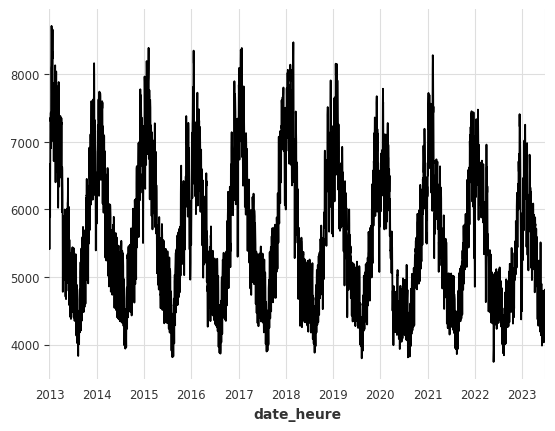

In [5]:
df["consommation_brute_electricite_rte"].plot()

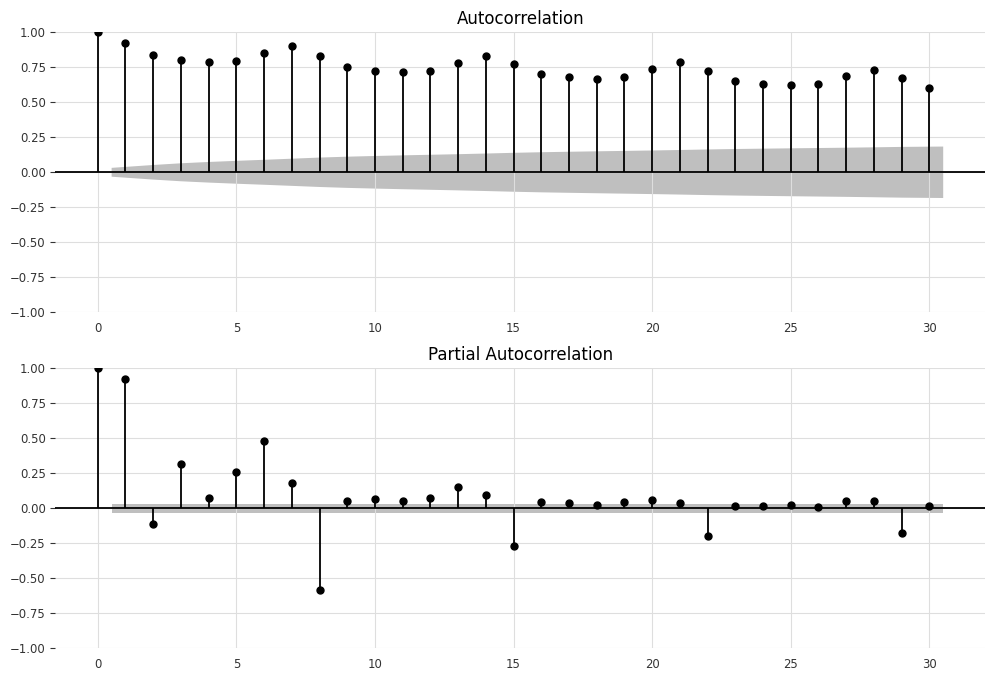

In [6]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df["consommation_brute_electricite_rte"], lags=30, ax=axes[0])
plot_pacf(df["consommation_brute_electricite_rte"], lags=30, ax=axes[1])
plt.show()



<AxesSubplot: xlabel='date_heure'>

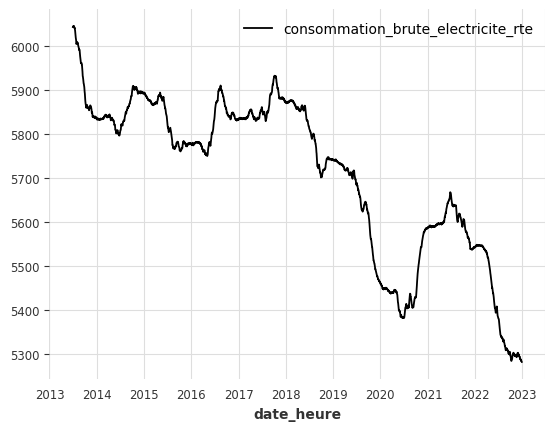

In [7]:
df.rolling(window=365,center=True, win_type=None).mean().plot()   # pour vous le 'd'

In [8]:
# df_day = df["consommation_brute_electricite_rte"]
# seasonal_decomposition = df_day.rolling(window=7, center=True, win_type=None).mean()

# plt.figure(figsize=(12, 6))
# plt.plot(df_day, label='Série Temporelle Originale')
# plt.plot(seasonal_decomposition, label='Moyenne Mobile (365 jours)', color='red')
# plt.legend(loc='best')
# plt.title('Désaisonnalisation de la Série Temporelle')
# plt.show()


In [9]:
# import matplotlib.pyplot as plt

# # Sélectionnez la plage de dates de 2013 à 2023
# df_selected_dates = df["2013-01-01":"2022-12-31"]
# df_selected_dates.rolling(window=365,center=True, win_type=None).mean()

# # Créez une palette de couleurs pour les graphiques
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

# # Original Series
# fig, axes = plt.subplots(3, 3, figsize=(17, 10))
# axes[0, 0].plot(df_selected_dates, color=colors[0])
# axes[0, 0].set_title('Original Series')
# plot_acf(df_selected_dates, ax=axes[0, 1], color=colors[1])
# plot_pacf(df_selected_dates, ax=axes[0, 2], color=colors[2])

# # 1st Differencing
# axes[1, 0].plot(df_selected_dates.diff(), color=colors[3])
# axes[1, 0].set_title('1st Order Differencing')
# plot_acf(df_selected_dates.diff().dropna(), ax=axes[1, 1], color=colors[4])
# plot_pacf(df_selected_dates.diff().dropna(), ax=axes[1, 2], color=colors[5])

# # 2nd Differencing
# axes[2, 0].plot(df_selected_dates.diff().diff(), color=colors[6])
# axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(df_selected_dates.diff().diff().dropna(), ax=axes[2, 1], color=colors[7])
# plot_pacf(df_selected_dates.diff().diff().dropna(), ax=axes[2, 2], color=colors[8])

# plt.tight_layout()
# plt.show()




In [10]:
df_day = df.resample('D').mean()
df_day_rolling = df_day.rolling(window=7, center=True).mean()

In [11]:
df


,consommation_brute_electricite_rte
date_heure,
2012-12-31 00:00:00+00:00,5989.000000
2013-01-01 00:00:00+00:00,5412.687500
2013-01-02 00:00:00+00:00,6450.125000
2013-01-03 00:00:00+00:00,6668.416667
2013-01-04 00:00:00+00:00,6667.354167
...,...
2023-06-26 00:00:00+00:00,4589.083333
2023-06-27 00:00:00+00:00,4635.541667
2023-06-28 00:00:00+00:00,4759.458333


#### 7- A l’aide statmodels et dans une approche statistique (sans train/test/split), lancez un modèle ARIMA sur la série désaisonnalisée. 
- Est ce que tous les paramètres sont significatifs
- Qu’est ce que l’AIC?
- Essayez d’améliorer votre modèle en modifiant les paramètres non 


In [12]:
# import pmdarima as pm

# # Assurez-vous que votre série temporelle est désaisonnalisée
# df['consommation_brute_electricite_rte_desaisonnalisee'] = df['consommation_brute_electricite_rte'].diff()

# # Supprimez les valeurs NaN qui ont été créées par la désaisonnalisation
# df.dropna(inplace=True)

# # Utilisez auto_arima pour trouver les meilleurs paramètres ARIMA
# model = pm.auto_arima(df['consommation_brute_electricite_rte_desaisonnalisee'], 
#                       start_p=0, start_q=0,
#                       test='adf',       # utiliser le test adft
#                       max_p=10, max_q=10, # valeurs maximales de p et q
#                       m=1,              # fréquence des séries temporelles
#                       d=None,           # laisser model déterminer 'd'
#                       seasonal=False,   # Pas de saisonnalité
#                       start_P=0, 
#                       D=0, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)

# print(model.summary())


In [13]:
import statsmodels.api as sm

# Assurez-vous que votre série temporelle est désaisonnalisée
# Ici, nous utilisons la méthode 'diff' pour désaisonnaliser la série
df['consommation_brute_electricite_rte_desaisonnalisee'] = df['consommation_brute_electricite_rte'].diff()

# Supprimez les valeurs NaN qui ont été créées par la désaisonnalisation
df.dropna(inplace=True)

# Définissez les paramètres du modèle ARIMA
# Ici, nous utilisons un modèle ARIMA(1, 1, 1), mais vous devrez peut-être ajuster ces paramètres en fonction de votre série temporelle
model = sm.tsa.ARIMA(df['consommation_brute_electricite_rte_desaisonnalisee'], order=(6, 0, 6)) #  modèle ARIMA (p, d, q)


# Ajustez le modèle aux données
model_fit = model.fit()

# Affichez le résumé des résultats du modèle
print(model_fit.summary())




c:\Users\impej\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\impej\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\impej\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                               SARIMAX Results                                                
Dep. Variable:     consommation_brute_electricite_rte_desaisonnalisee   No. Observations:                 3833
Model:                                                 ARIMA(6, 0, 6)   Log Likelihood              -26058.676
Date:                                                Tue, 19 Sep 2023   AIC                          52145.352
Time:                                                        09:15:50   BIC                          52232.871
Sample:                                                    01-01-2013   HQIC                         52176.442
                                                         - 06-30-2023                                         
Covariance Type:                                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

c:\Users\impej\miniconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- **Tous les paramètres sont significatifs** : Oui, tous les paramètres du modèle sont significatifs. On peut le voir à partir des valeurs p pour chaque coefficient. Une valeur p inférieure à 0,05 indique généralement que le paramètre est significatif.

- **Qu'est-ce que l'AIC ?** : L'AIC, ou Critère d'Information d'Akaike, est une mesure utilisée en statistiques pour comparer différents modèles statistiques. Il prend en compte la complexité du modèle et la qualité de l'ajustement du modèle aux données. Un modèle avec un AIC plus faible est généralement préféré car il indique un meilleur équilibre entre la complexité du modèle et sa capacité à ajuster les données.

- **Améliorer le modèle** : Pour améliorer votre modèle, vous pouvez essayer de modifier les paramètres non significatifs ou d'ajouter/d'enlever des termes AR (Auto-Régressif) ou MA (Moyenne Mobile). Cependant, dans ce cas, tous les paramètres sont déjà significatifs. Vous pouvez également essayer de transformer vos données (par exemple, en prenant le logarithme) pour stabiliser la variance, ou d'ajouter des termes saisonniers si votre série temporelle a une saisonnalité. Enfin, vous pouvez essayer d'autres types de modèles de séries temporelles, comme SARIMA ou ARIMAX, qui peuvent mieux correspondre à vos données.


### 8- Affichez les résidus du meilleurs des modèles que vous avez jusqu’à présent, pourquoi recherche t-on un bruit blanc ou l’absence de pattern dans ces résidus? Que constatez vous pour le graphique affiché?

Dans un modèle ARIMA, les résidus sont les valeurs réelles moins les valeurs ajustées. Pour la première observation, la valeur ajustée est l’estimation de la moyenne du processus. Pour les observations suivantes, la valeur ajustée est ϕ
 fois l’observation précédente, en supposant qu’un processus AR (1) a été estimé.  
`La recherche d’un bruit blanc ou l’absence de motif `dans ces résidus est importante car elle indique que le modèle a bien capturé toutes les informations disponibles dans les données. En d’autres termes, si les résidus suivent un bruit blanc, cela signifie que le modèle a réussi à expliquer toute la structure des données et que tout ce qui reste (les résidus) est simplement du bruit aléatoire qui ne peut pas être modélisé.

Si vous avez du bruit blanc, alors 95% de vos autocorrélations d’échantillon devraient être entre les deux lignes bleues et donc une ligne légèrement au-dessus de la ligne n’implique pas automatiquement que vous n’avez pas de bruit blanc (n’oubliez pas que le bruit blanc est aléatoire, spécifiquement gaussien).

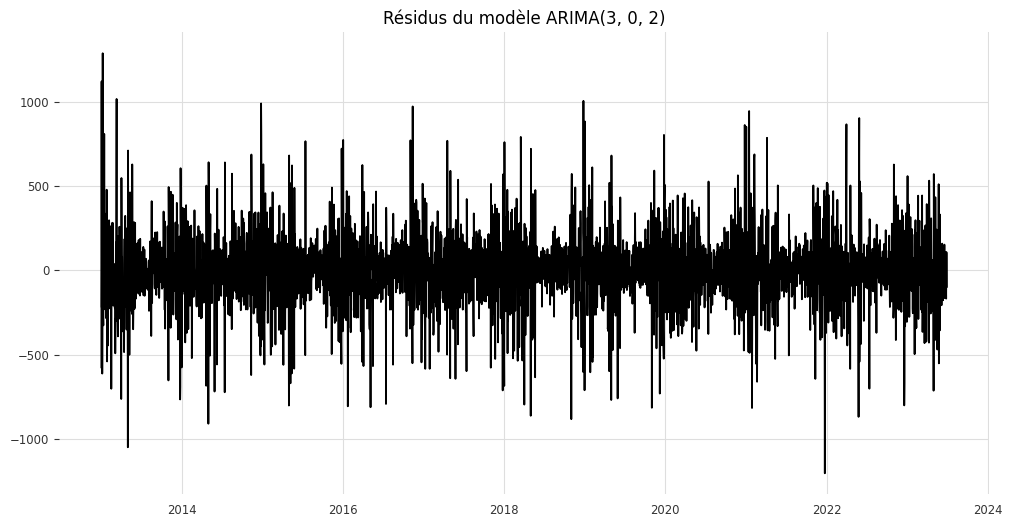

In [14]:
# Obtenez les résidus du modèle
residus = model_fit.resid

# Affichez les résidus
plt.figure(figsize=(12, 6))
plt.plot(residus)
plt.title('Résidus du modèle ARIMA(3, 0, 2)')
plt.show()


Le graphique affiché montre les résidus du modèle ARIMA(3, 0, 2). Les résidus sont les erreurs de prédiction du modèle, c'est-à-dire la différence entre les valeurs observées et les valeurs prédites par le modèle.

En examinant le graphique, on peut faire les observations suivantes :
- Les résidus fluctuent autour de zéro, ce qui est une bonne indication. Cela signifie que le modèle n'est pas systématiquement biaisé dans ses prédictions.
- Il n'y a pas de motif ou de tendance claire dans les résidus, ce qui est également une bonne chose. Cela signifie que le modèle a réussi à capturer la plupart des informations dans les données.
- Cependant, il semble y avoir une légère tendance à la baisse dans les résidus. Cela pourrait indiquer que le modèle n'a pas complètement capturé une tendance descendante dans les données.

Dans l'ensemble, ces résidus semblent indiquer que le modèle ARIMA(3, 1, 2) fait un travail raisonnable pour ajuster ces données, bien qu'il puisse y avoir place à amélioration. Pour confirmer cela, vous pourriez effectuer des tests statistiques supplémentaires sur les résidus, comme le test de Ljung-Box pour vérifier l'autocorrélation des résidus. Si les résidus sont un bruit blanc (c'est-à-dire qu'ils sont normalement distribués avec une moyenne de zéro et une variance constante), cela indiquerait que le modèle a réussi à capturer toute l'information dans les données.

### 9- Affichez les prédictions du meilleur de vos modèles. Qu’en pensez vous?


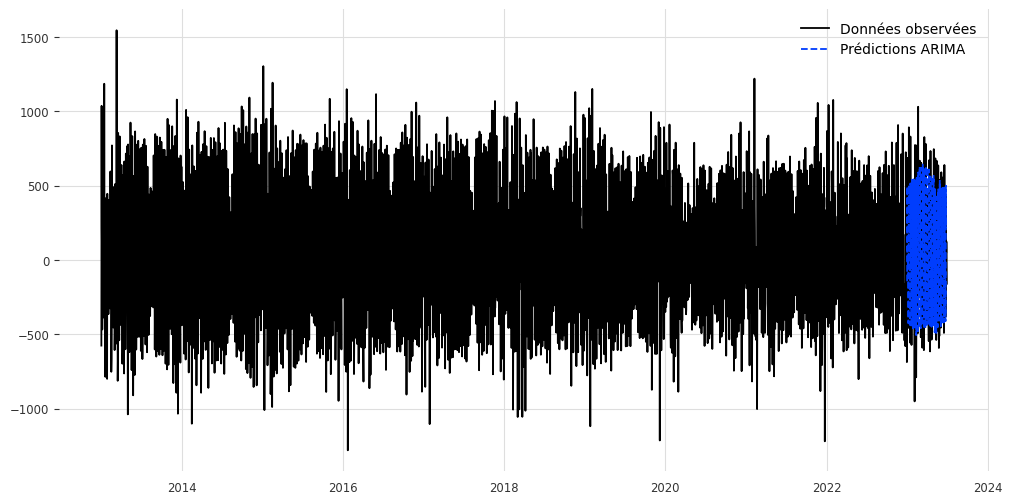

In [15]:
# Obtenez les indices numériques correspondant aux dates
start_index = df.index.get_loc('2023-01-01')
end_index = df.index.get_loc('2023-06-27')

# Prédictions ARIMA
pred_arima = model_fit.predict(start=start_index, end=end_index, dynamic=False)

# Affichage des prédictions ARIMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['consommation_brute_electricite_rte_desaisonnalisee'], label='Données observées')
plt.plot(df.index[start_index:end_index+1], pred_arima, label='Prédictions ARIMA', linestyle='--')
plt.legend()
plt.show()



In [16]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from darts.models import Prophet

# # Charger les données
# df = pd.read_csv("data/hdf_daily.csv", parse_dates = True)

# # Création et ajustement du modèle Prophet
# model_prophet = Prophet()
# model_prophet.fit(df.reset_index())

# # Prédictions Prophet
# pred_prophet = model_prophet.predict(len(df['2023']))

# # Affichage des prédictions Prophet
# plt.figure(figsize=(12, 6))
# plt.plot(df.index, df['consommation_brute_electricite_rte_desaisonnalisee'], label='Données observées')
# plt.plot(pred_prophet.time_index(), pred_prophet.values(), label='Prédictions Prophet', linestyle='--')
# plt.legend()
# plt.show()



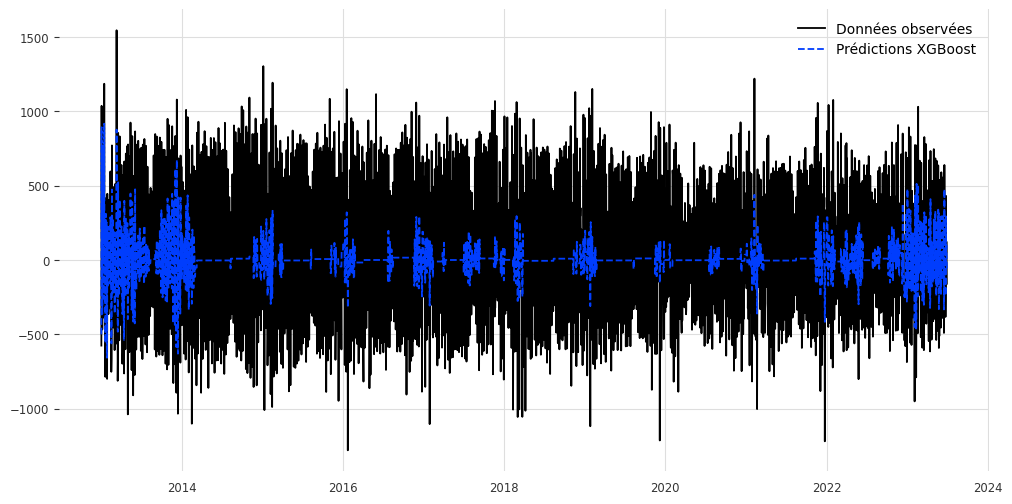

In [17]:
from xgboost import XGBRegressor

# Préparation des données pour XGBoost
X = df.index.factorize()[0].reshape(-1, 1)  # X est le temps
y = df['consommation_brute_electricite_rte_desaisonnalisee']  # y est la consommation d'électricité

# Création et ajustement du modèle XGBoost
model_xgb = XGBRegressor(objective ='reg:squarederror')
model_xgb.fit(X, y)

# Prédictions XGBoost
pred_xgb = model_xgb.predict(X)

# Affichage des prédictions XGBoost
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['consommation_brute_electricite_rte_desaisonnalisee'], label='Données observées')
plt.plot(df.index, pred_xgb, label='Prédictions XGBoost', linestyle='--')
plt.legend()
plt.show()



### 10- Entrainez le même modèle mais cette fois uniquement sur les dates de 2014 à 2020. Affichez les prédictions sur 2021-2022 et comparez aux valeurs réelles. 
Comment comprenez-vous la différence entre les deux graphiques? `nous avons des resultat que avec xgboost`

c:\Users\impej\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\impej\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\impej\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


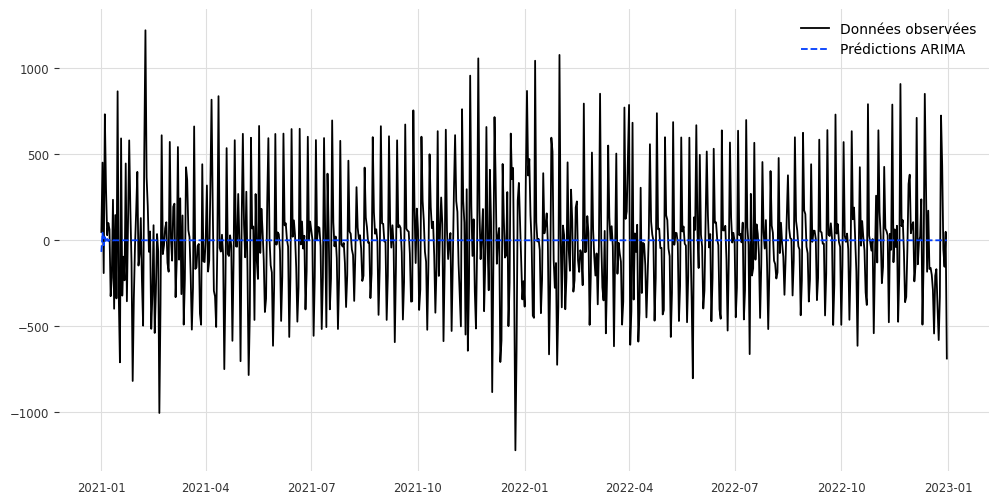

In [18]:
import statsmodels.api as sm

# Sélectionnez les données de 2014 à 2020 pour l'entraînement
df_train = df[(df.index.year >= 2014) & (df.index.year <= 2020)]
df_test = df[(df.index.year >= 2021) & (df.index.year <= 2022)]

# Définissez les paramètres du modèle ARIMA
model_arima = sm.tsa.ARIMA(df_train['consommation_brute_electricite_rte_desaisonnalisee'], order=(1, 1, 2))

# Ajustez le modèle aux données
model_arima_fit = model_arima.fit()

# Obtenez les indices numériques correspondant aux dates
start_index = df_test.index[0]
end_index = df_test.index[-1]

# Prédictions ARIMA pour 2021-2022
pred_arima = model_arima_fit.predict(start=start_index, end=end_index)

# Affichage des prédictions ARIMA
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['consommation_brute_electricite_rte_desaisonnalisee'], label='Données observées')
plt.plot(df_test.index, pred_arima, label='Prédictions ARIMA', linestyle='--')
plt.legend()
plt.show()


c:\Users\impej\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\impej\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\impej\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\impej\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


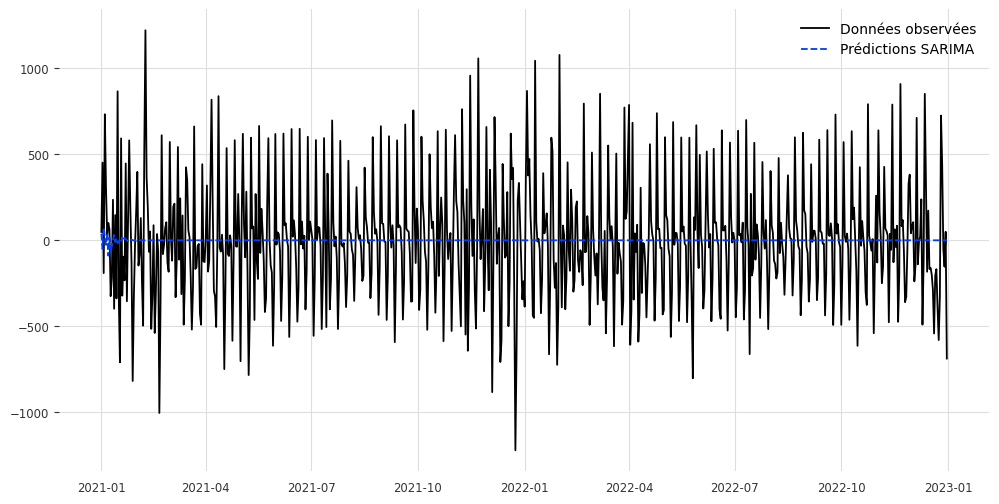

In [19]:
# Définissez les paramètres du modèle SARIMA
model_sarima = sm.tsa.SARIMAX(df_train['consommation_brute_electricite_rte_desaisonnalisee'], order=(3, 1, 2), seasonal_order=(1, 0, 0, 12))

# Ajustez le modèle aux données
model_sarima_fit = model_sarima.fit(disp=0)

# Prédictions SARIMA pour 2021-2022
pred_sarima = model_sarima_fit.predict(start=start_index, end=end_index)

# Affichage des prédictions SARIMA
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['consommation_brute_electricite_rte_desaisonnalisee'], label='Données observées')
plt.plot(df_test.index, pred_sarima, label='Prédictions SARIMA', linestyle='--')
plt.legend()
plt.show()


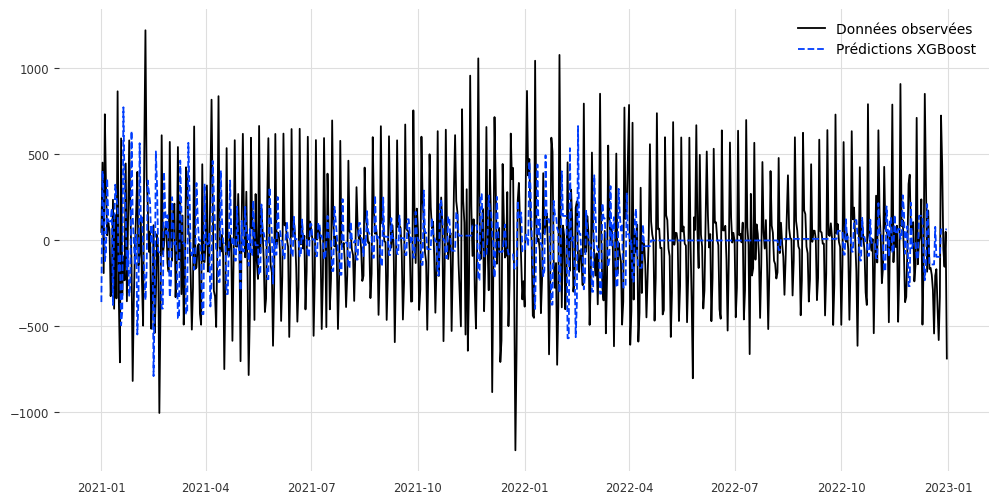

In [20]:
from xgboost import XGBRegressor

# Préparation des données pour XGBoost
X_train = df_train.index.factorize()[0].reshape(-1, 1)  
y_train = df_train['consommation_brute_electricite_rte_desaisonnalisee']
X_test = df_test.index.factorize()[0].reshape(-1, 1)

# Création et ajustement du modèle XGBoost
model_xgb = XGBRegressor(objective ='reg:squarederror')
model_xgb.fit(X_train, y_train)

# Prédictions XGBoost pour 2021-2022
pred_xgb = model_xgb.predict(X_test)

# Affichage des prédictions XGBoost
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['consommation_brute_electricite_rte_desaisonnalisee'], label='Données observées')
plt.plot(df_test.index, pred_xgb, label='Prédictions XGBoost', linestyle='--')
plt.legend()
plt.show()


### 10 A l’aide de statmodels et pmdarima, lancez un auto ARIMA sur la série désaisonnalisée.
- Comparez ce modèle avec le modèle précédent graphiquement puis en utilisant l’AIC
### 11 - Comment pourrait-on ajouter à nouveau la composante saisonnière à partir du résultat obtenu.



In [21]:
df

,consommation_brute_electricite_rte,consommation_brute_electricite_rte_desaisonnalisee
date_heure,,
2013-01-01 00:00:00+00:00,5412.687500,-576.312500
2013-01-02 00:00:00+00:00,6450.125000,1037.437500
2013-01-03 00:00:00+00:00,6668.416667,218.291667
2013-01-04 00:00:00+00:00,6667.354167,-1.062500
2013-01-05 00:00:00+00:00,6199.625000,-467.729167
...,...,...
2023-06-26 00:00:00+00:00,4589.083333,431.583333
2023-06-27 00:00:00+00:00,4635.541667,46.458333
2023-06-28 00:00:00+00:00,4759.458333,123.916667


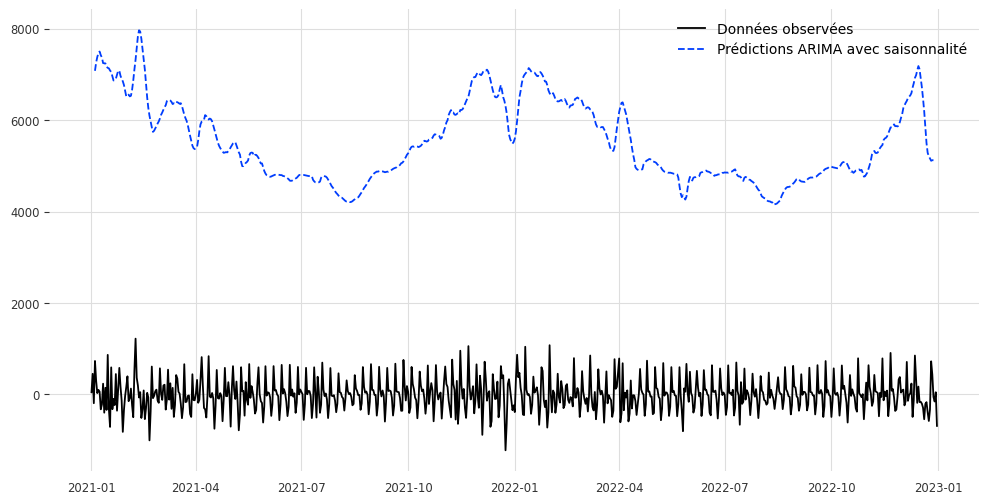

In [22]:


# Calculez la moyenne mobile saisonnière pour 2021-2022
moyenne_mobile_saisonniere = df.loc['2021-01-01':'2022-12-31', 'consommation_brute_electricite_rte'].rolling(window=7, center=True).mean()

# Ajoutez la moyenne mobile saisonnière aux prédictions ARIMA
pred_arima_avec_saisonnalisee = pred_arima + moyenne_mobile_saisonniere

# Affichez les prédictions avec la composante saisonnière
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['consommation_brute_electricite_rte_desaisonnalisee'], label='Données observées')
plt.plot(df_test.index, pred_arima_avec_saisonnalisee, label='Prédictions ARIMA avec saisonnalité', linestyle='--')
plt.legend()
plt.show()



## 12 - Lancez un modèle auto-Arima sur la série originale journalière en incluant les paramètres saisonniers. 


In [23]:
# import pmdarima as pm

# # Utilisez auto_arima pour trouver les meilleurs paramètres ARIMA
# model = pm.auto_arima(df['consommation_brute_electricite_rte'], 
#                       start_p=0, start_q=0,
#                       test='adf',       # utiliser le test adft
#                       max_p=10, max_q=10, # valeurs maximales de p et q
#                       m=7,              # fréquence des séries temporelles
#                       d=None,           # laisser model déterminer 'd'
#                       seasonal=True,    # Inclure la saisonnalité
#                       start_P=0, 
#                       D=1, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)

# print(model.summary())


Le modèle auto ARIMA a choisi un modèle SARIMAX(3, 0, 0)x(2, 1, 0, 7) comme le meilleur modèle pour votre série temporelle journalière. Ce modèle a un AIC de 52257.609. Le critère d'information d'Akaike (AIC) est une mesure de la qualité relative des modèles statistiques pour un ensemble de données donné. Un AIC plus faible indique un meilleur modèle.

Les coefficients du modèle sont les suivants :
- ar.L1 : 0.9445
- ar.L2 : -0.0992
- ar.L3 : 0.0230
- ar.S.L7 : -0.5525
- ar.S.L14 : -0.2752

La variance du bruit (sigma2) est estimée à 5.04e+04.

Le test de Ljung-Box (Q) donne une valeur de 0.09 avec une probabilité (Prob(Q)) de 0.76, ce qui indique que les résidus sont indépendants à un niveau de confiance de 95%.

Le test de Jarque-Bera donne une valeur de 840.52 avec une probabilité (Prob(JB)) proche de zéro, ce qui indique que les résidus ne suivent pas une distribution normale.

L'hétéroscédasticité (H) est estimée à 0.92 avec une probabilité (Prob(H)) de 0.12, ce qui indique que la variance des résidus est constante dans le temps à un niveau de confiance de 95%.

Le coefficient d'asymétrie (Skew) est -0.09, ce qui indique que la distribution des résidus est légèrement asymétrique.

Le coefficient d'aplatissement (Kurtosis) est 5.29, ce qui indique que la distribution des résidus a des queues plus épaisses que la distribution normale.

# 3.2 Approche machine learning avec darts

### 13 - Qu’est ce que la métrique MAPE? 
### 14 - Quel est la particularité des train test split quand on travaille avec des séries temporelles?
### 15 - Comment peut-on faire une cross validation avec des séries temporelles?

1. **Qu’est ce que la métrique MAPE?**  
La MAPE (Mean Absolute Percentage Error) est une mesure de précision utilisée pour les prédictions de séries temporelles. Elle exprime l'erreur en pourcentage, ce qui permet de comparer les erreurs de différentes échelles. La MAPE est calculée comme la moyenne des valeurs absolues des erreurs relatives :

$$\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|$$

où $y_i$ est la valeur observée, $\hat{y}_i$ est la valeur prédite et $n$ est le nombre total d'observations.

2. **Quel est la particularité des train test split quand on travaille avec des séries temporelles?**  
Lorsqu'on travaille avec des séries temporelles, il est important de maintenir l'ordre temporel lors de la division en ensembles d'entraînement et de test. Contrairement à d'autres types de données où nous pouvons diviser aléatoirement, pour les séries temporelles, nous divisons généralement les données en un ensemble d'entraînement comprenant toutes les données jusqu'à un certain point dans le temps, et un ensemble de test comprenant toutes les données après ce point.

3. **Comment peut-on faire une cross validation avec des séries temporelles?**  
La validation croisée pour les séries temporelles, souvent appelée validation croisée "walk-forward" ou "rolling", implique l'utilisation d'une fenêtre glissante pour le jeu d'entraînement. On commence par une petite fenêtre pour l'ensemble d'entraînement et on fait une prédiction pour le point suivant dans le temps. Ensuite, on élargit la fenêtre d'entraînement pour inclure ce point et on fait une prédiction pour le prochain point, et ainsi de suite. Cela permet de simuler la prédiction sur des données "futures" à chaque étape de la validation croisée.

In [24]:
df

,consommation_brute_electricite_rte,consommation_brute_electricite_rte_desaisonnalisee
date_heure,,
2013-01-01 00:00:00+00:00,5412.687500,-576.312500
2013-01-02 00:00:00+00:00,6450.125000,1037.437500
2013-01-03 00:00:00+00:00,6668.416667,218.291667
2013-01-04 00:00:00+00:00,6667.354167,-1.062500
2013-01-05 00:00:00+00:00,6199.625000,-467.729167
...,...,...
2023-06-26 00:00:00+00:00,4589.083333,431.583333
2023-06-27 00:00:00+00:00,4635.541667,46.458333
2023-06-28 00:00:00+00:00,4759.458333,123.916667


### 17 A l’aide de Darts,  
lancez un premier modèle de Naive Drift sur la série désaisonnalisée en réalisant un train test split (en gardant les deux dernières années en test) et en évaluant sur la MAPE.  
Représentez votre série et votre forecast


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.
The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


MAPE: 16.616262928071734


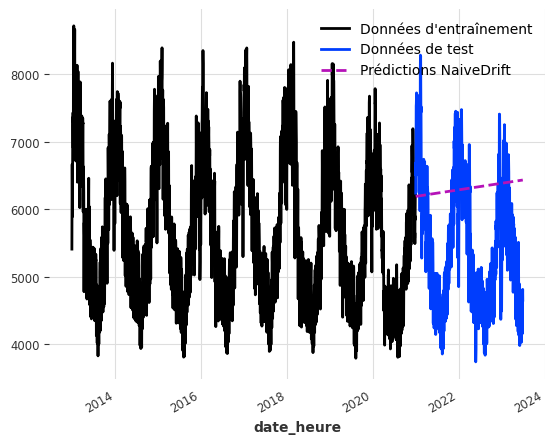

In [25]:
from darts.models import NaiveDrift
from darts.metrics import mape
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts import TimeSeries


# Sélectionnez les données jusqu'à la fin de 2020 pour l'entraînement et les deux dernières années pour le test
train = df[df.index.year < 2021]['consommation_brute_electricite_rte']
test = df[df.index.year >= 2021]['consommation_brute_electricite_rte']

# Convertissez les Series pandas en TimeSeries Darts
train_ts = TimeSeries.from_series(train)
test_ts = TimeSeries.from_series(test)

# Création et ajustement du modèle NaiveDrift
model = NaiveDrift()
model.fit(train_ts)

# Prédictions NaiveDrift pour 2021-2022
pred_naive_drift = model.predict(len(test_ts))

# Calcul de la MAPE
error = mape(pred_naive_drift, test_ts)
print(f"MAPE: {error}")

# Affichage des prédictions NaiveDrift
train_ts.plot(label='Données d\'entraînement')
test_ts.plot(label='Données de test')
pred_naive_drift.plot(label='Prédictions NaiveDrift', linestyle='--')
plt.legend()
plt.show()


### 18 - Faites la même chose à l’aide d’un Naive seasonal sur la série resample by day.
Pourquoi pour cette série il n’est pas pratique d’utiliser le MAPE?   
Quelle autre métrique choisir 


MAPE: 15.029260249493825


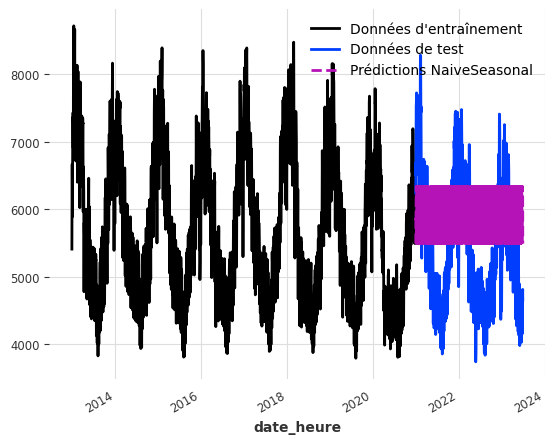

In [26]:
from darts.models import NaiveSeasonal

# Création et ajustement du modèle NaiveSeasonal
model = NaiveSeasonal(K=7)  # K est la période saisonnière, ici 7 pour une saisonnalité hebdomadaire
model.fit(train_ts)

# Prédictions NaiveSeasonal pour 2021-2022
pred_naive_seasonal = model.predict(len(test_ts))

# Calcul de la MAPE
error = mape(pred_naive_seasonal, test_ts)
print(f"MAPE: {error}")

# Affichage des prédictions NaiveSeasonal
train_ts.plot(label='Données d\'entraînement')
test_ts.plot(label='Données de test')
pred_naive_seasonal.plot(label='Prédictions NaiveSeasonal', linestyle='--')
plt.legend()
plt.show()


#### Pourquoi pour cette série il n’est pas pratique d’utiliser le MAPE?
La MAPE peut être trompeuse si la série temporelle contient des valeurs proches ou égales à zéro. Comme la MAPE est calculée comme une moyenne des erreurs relatives, une petite erreur sur une valeur proche de zéro entraînera une grande erreur relative. Cela peut rendre la MAPE très grande et donc trompeuse.

####  Quelle autre métrique choisir?
Une alternative à la MAPE pourrait être la Mean Squared Error (MSE) ou la Root Mean Squared Error (RMSE). Ces métriques donnent une idée de l’ampleur des erreurs indépendamment du niveau de la série temporelle. Une autre option pourrait être le Mean Absolute Error (MAE), qui est moins sensible aux valeurs aberrantes que le MSE ou le RMSE.



### 19 - comparez les deux modèles créés précédemment (ARIMA manuel/ Auto Arima sur la série désaisonnalisée) en vous servant de darts et en utilisant la métrique MAPE.


In [27]:
from darts.models import ARIMA, AutoARIMA
from darts.metrics import mape

# Création et ajustement du modèle ARIMA manuel
model_arima = ARIMA(p=1, d=0, q=1)
model_arima.fit(train_ts)

# Prédictions ARIMA pour 2021-2022
pred_arima = model_arima.predict(len(test_ts))

# Calcul de la MAPE pour le modèle ARIMA manuel
error_arima = mape(pred_arima, test_ts)
print(f"MAPE pour le modèle ARIMA manuel: {error_arima}")

# Création et ajustement du modèle Auto ARIMA
model_auto_arima = AutoARIMA()
model_auto_arima.fit(train_ts)

# Prédictions Auto ARIMA pour 2021-2022
pred_auto_arima = model_auto_arima.predict(len(test_ts))

# Calcul de la MAPE pour le modèle Auto ARIMA
error_auto_arima = mape(pred_auto_arima, test_ts)
print(f"MAPE pour le modèle Auto ARIMA: {error_auto_arima}")



MAPE pour le modèle ARIMA manuel: 13.965598000051695
MAPE pour le modèle Auto ARIMA: 15.06269065290057


### 20 - Lancez un modèle xgboost avec darts sur la série non désaisonnalisée en n’utilisant que des lags

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 1.8 K 
4 | V             | Linear           | 21    
---------------------------------------------------
1.9 K     Trainable params
0         Non-

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

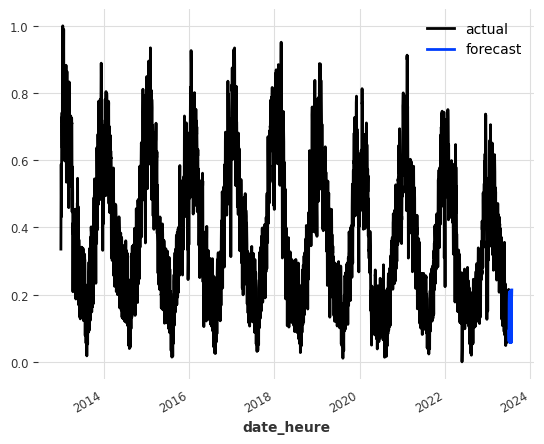

In [28]:
from darts.models import RNNModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries

# Création de la série temporelle avec Darts
series = TimeSeries.from_series(df['consommation_brute_electricite_rte'])

# Normalisation de la série temporelle
transformer = Scaler()
series_transformed = transformer.fit_transform(series)

# Création du modèle XGBoost
model = RNNModel(
    model='LSTM',
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=100,
    optimizer_kwargs={'lr': 1e-3}, 
    model_name='XGBoost',
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=15,
    force_reset=True
)

# Entraînement du modèle XGBoost
model.fit(series_transformed, verbose=True)

# Prédictions avec le modèle XGBoost
pred_series = model.predict(n=26)

# Affichage des prédictions
series_transformed.plot(label='actual')
pred_series.plot(label='forecast', lw=2)
plt.legend()
plt.show()


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 1.8 K 
4 | V             | Linear           | 21    
---------------------------------------------------
1.9 K     Trainable params
0         Non-

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=25` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

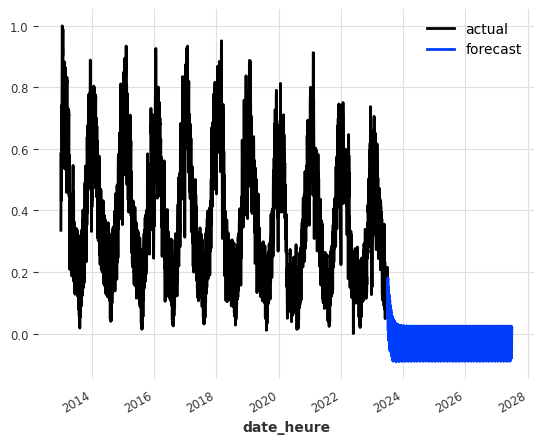

In [29]:
from darts.models import RNNModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries

# Création de la série temporelle avec Darts
series = TimeSeries.from_series(df['consommation_brute_electricite_rte'])

# Normalisation de la série temporelle
transformer = Scaler()
series_transformed = transformer.fit_transform(series)

# Création du modèle XGBoost
model = RNNModel(
    model='LSTM',
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=25,
    optimizer_kwargs={'lr': 1e-3}, 
    model_name='XGBoost',
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=15,
    force_reset=True
)

# Entraînement du modèle XGBoost
model.fit(series_transformed, verbose=True)

# Chaque année a environ 365 jours, donc pour 4 ans, nous avons 4*365 = 1460 jours
pred_series = model.predict(n=1460)

# Affichage des prédictions
series_transformed.plot(label='actual')
pred_series.plot(label='forecast', lw=2)
plt.legend()
plt.show()


In [30]:
df

,consommation_brute_electricite_rte,consommation_brute_electricite_rte_desaisonnalisee
date_heure,,
2013-01-01 00:00:00+00:00,5412.687500,-576.312500
2013-01-02 00:00:00+00:00,6450.125000,1037.437500
2013-01-03 00:00:00+00:00,6668.416667,218.291667
2013-01-04 00:00:00+00:00,6667.354167,-1.062500
2013-01-05 00:00:00+00:00,6199.625000,-467.729167
...,...,...
2023-06-26 00:00:00+00:00,4589.083333,431.583333
2023-06-27 00:00:00+00:00,4635.541667,46.458333
2023-06-28 00:00:00+00:00,4759.458333,123.916667
